## Skill-Assessment Exercise 11.3

#### PROBLEM

Design a lead compensator for the system in Skill-Assessment Exercise 11.1 to meet the following specifications: OS% = 20%, $T_{s}$ = 0.2s, and $K_{v}$ = 50.

#### ANSWER

The system from Skill-Assessment Exercise 11.1 is

$$
G(s) = \frac{194,200}{s(s+50)(s+120)}
$$

The design procedure steps from section 11.4 are followed below.

1. Find the closed-loop bandwidth given the settling, time, or rise time requirement.

All variations of the closed-loop bandwidth equation depend on the damping ratio $\zeta$, so this will be computed first from the given OS%.

$$
\zeta = \frac{-ln(OS/100)}{\sqrt{\pi^{2}+ln(OS/100)}}
      = \frac{-ln(20/100)}{\sqrt{\pi^{2}+ln(20/100)}}
      = 0.456
$$

Since $T_{s}$ has been given, Eq 10.55 will be used:

$$
\omega_{BW}  = \frac{4}{T_{s}\zeta}\sqrt{1-2\zeta^{2}+\sqrt{4\zeta^{4}-4\zeta^{2}+2}}
$$
$$
             = \frac{4}{0.2(0.456)}\sqrt{1-2(0.456)^{2}+\sqrt{4(0.456)^{4}-4(0.456)^{2}+2}}
$$
$$
             = 57.892
$$


2. Set $K$ of the uncompensated system to the value that satisfies the steady-state error requirement.

The $K_{v}$ of the current system is 

$$
K_{v} = \lim_{s\to0} sG(s) = \frac{194,200}{(50)(120)} = \frac{971}{30} \approx 32.366
$$

However, we want to change the gain (currently 194,200) so that $K_{v}$ = 50 instead of 32.366. Solve for the unknown gain $x$ with $K_{v}$ set to 50.

$$
K_{v} = \frac{x}{(50)(120)} = 50
$$
$$
\Rightarrow x = 300,000
$$

Thus, the uncompensated system with $K_{v}$ = 50 is 

$$
G(s) = \frac{300,000}{s(s+50)(s+120)}
$$

3. Generate the Bode plots for this gain and determine the uncompensated system's phase margin.

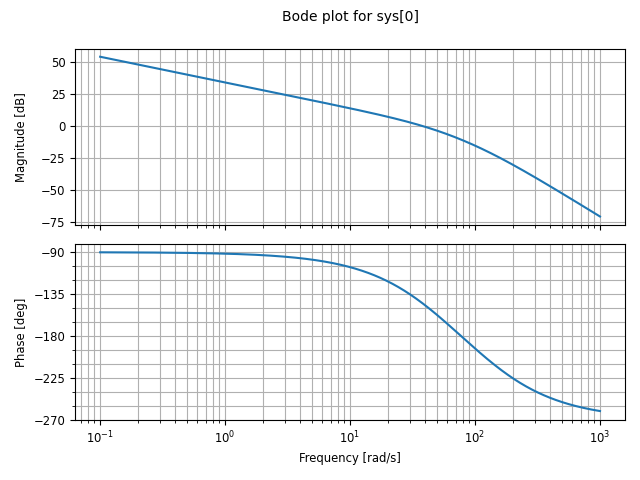

In [1]:
#  Import libraries
import numpy as np
import matplotlib.pyplot as plt
import control as ct
# Make plots interactable
%matplotlib ipympl

# Generate Bode plots for the uncompensated system G(s)
K = 300000 # System gain with ramp input steady state error such that Kv = 50
numg = [K]
deng = np.poly([0, -50, -120])
G = ct.tf(numg, deng)
fig = plt.figure(1)
ct.bode(G, [1e-1, 1e3], dB=True)

# Clean up unused variables
del K, numg, deng, G, fig

From the Bode plots, the uncompensated system's phase margin is 35.22°. This was found finding the phase at 0dB (-144.783°) and subtracting this from -180°.

4. Compute the phase margin needed for the compensated system given the damping ratio or overshoot requirement. Evaluate additional phase contribution required from compensator.

Using the 0.456 damping ratio (from the given 20% overshoot), the phase margin needed can be computed from Eq 10.73

$$
\Phi_{M} = tan^{-1} \frac{2\zeta}{\sqrt{-2\zeta^{2}+\sqrt{1+4\zeta^{4}}}}
$$
$$
\Phi_{M} = tan^{-1} \frac{2(0.456)}{\sqrt{-2(0.456)^{2}+\sqrt{1+4(0.456)^{4}}}}
$$
$$
         = 48.15°
$$

This is the phase margin needed from the compensated system. Since the uncompensated system has 35.22° phase margin, the compensator needs to increase the phase by 48.15° - 35.22° = 12.93°. There is an additional "correction factor" that needs to be added by the compensator, that the book chooses to be 10°, which I don't fully understand. See Note 4 in Section 11.4 and Step 4 of Example 11.3 for more info. Thus, the compensator needs to increase phase by 12.93° + 10° = 22.93°.



5. Compute $\beta$ from lead compensator's phase contribution.

The total phase contribution -- or max phase -- from the compensator is given by Eq. 11.11. Since the max phase is known (22.93°), $\beta$ can be found.

$$
\phi_{max} = sin^{-1}\frac{1-\beta}{1+\beta}
$$
$$
\Rightarrow 22.93° = sin^{-1}\frac{1-\beta}{1+\beta}
$$
$$
\Rightarrow \beta = 0.44
$$

6. Compute the compensator's magnitude at its max phase.

Eq 11.12 can be used to compute this.

$$
|G_{c}(j\omega_{max})| = \frac{1}{\sqrt{\beta}} = \frac{1}{\sqrt{0.44}} = 1.51
$$

Converting to dB:

$$
20\cdot log_{10}(\frac{1}{\sqrt{0.44}}) = 3.57 dB
$$

7. Find the frequency in the magnitude plot of the uncompensated system where the magnitude is the negative of the compensator's max magnitude.

On the magnitude Bode plot of the uncompensated system, -3.57 dB is at 49.53 rad/s. Thus, $\omega_{max} = 49.53 rad/s$ is the new phase margin frequency (the lower frequency or start frequency of the phase margin region).

8. Design the lead compensator's break frequencies using Eqs 11.6 and 11.9.

Rearranging Eq 11.9 to solve for T:

$$
T = \frac{1}{\omega_{max}\sqrt{\beta}} = \frac{1}{49.53\sqrt{0.44}} = 0.0304
$$

From Eq 11.6, the equation shows that the zero break frequency is

$$
\frac{1}{T} = \frac{1}{0.0304} = 32.85 rad/s
$$

and that the pole break frequency is

$$
\frac{1}{\beta T} = \frac{1}{(0.44)(0.0304)} = 74.76 rad/s
$$

9. Compute the lead compensator's gain to keep the overall system's gain unchanged.

From Eq. 11.6, the compensator's gain is

$$
\frac{1}{\beta} = \frac{1}{0.44} = 2.27
$$

This keeps the dc gain of the compensator at unity to keep the overall system's gain at 300,000 which is what is needed for $K_{v}$ = 50.

Using Eq 11.6 and the previously computed compensator gain and pole- and zero-break frequencies, the lead compensator transfer function is


$$
G_{c}(s) = \frac{1}{\beta} \frac{s + \frac{1}{T}}{s + \frac{1}{\beta T}}
$$
$$
G_{c}(s) = 2.27 \cdot \frac{s + 32.85}{s + 74.76}
$$

The closed-loop step responses of both systems are plotted below. Observe that the settling time of the compensated system is now under 0.2 seconds and overshoot is well below 20%.

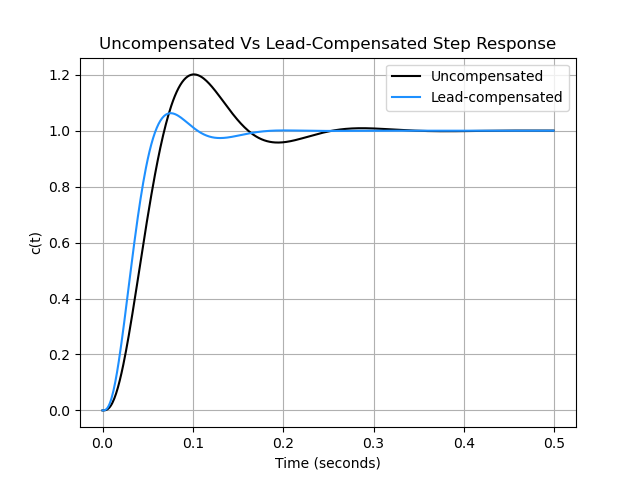

In [2]:
# Create open-loop transfer functions
Gu = ct.zpk([],[0,-50,-120],194200) # Uncompensated transfer function
Gc = ct.zpk([-32.85],[-74.76],2.27) # Lead compensator transfer function
Gce = Gu*Gc                         # Overall compensated transfer function

# Make transfer functions closed-loop
Tu = ct.feedback(Gu,1)              # Uncompensated transfer function in unity feedback loop
Tc = ct.feedback(Gce,1)             # Compensated transfer function in unity feedback loop

# Compute step responses for uncompensated and compensated transfer functions
# Time length and sample time chosen arbitrarily
t = np.arange(0, 0.5, 0.001) # Generate 0.5 second time series with 1ms sample time
Tu_resp = ct.step_response(Tu, t)
Tc_resp = ct.step_response(Tc, t)

# Plot uncompensated vs compensated step responses
y1 = Tu_resp.outputs['y[0]']
y2 = Tc_resp.outputs['y[0]']
plt.figure(2) # Create and use 2nd figure
plt.plot(t,y1,'k',t,y2,'dodgerblue')
plt.grid(True)
plt.legend(['Uncompensated', 'Lead-compensated'])
plt.ylabel('c(t)')
plt.xlabel('Time (seconds)')
plt.title('Uncompensated Vs Lead-Compensated Step Response')

# Clean up workspace for following cell executions
del Gc, Gu, Gce, Tu, Tc, Tu_resp, Tc_resp, y1, y2, t